In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
import cv2

from src.pca import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Task1.1

In [2]:
df = pd.read_csv('datasets/pca_dataset.txt',delim_whitespace=True, names=["x", "f(x)"])
pca_dataset = np.array(df,dtype=float)

Text(0, 0.5, 'f(x)')

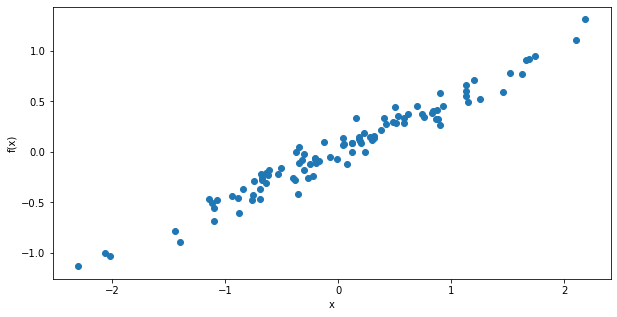

In [3]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.scatter(pca_dataset.T[0],pca_dataset.T[1])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

#fig.savefig("figure/task1-1.png")

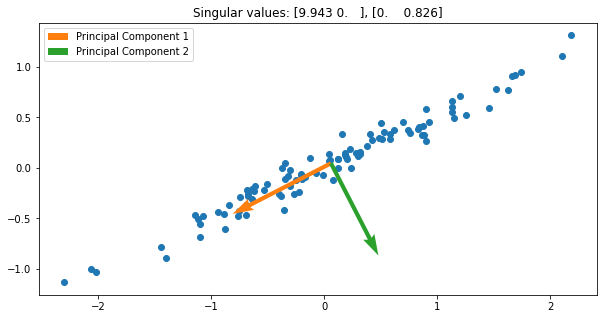

In [4]:
u,s,vh,s_truncated = pca(pca_dataset)
m = pca_dataset.mean(axis=0)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.scatter(pca_dataset.T[0],pca_dataset.T[1])
for i,pc in enumerate(vh):
    ax.quiver(m[0], m[1], pc[0], pc[1], label="Principal Component {0}".format(i+1),
              color=f"C{i + 1}",scale_units='xy', scale=1)

ax.set_title("Singular values: {0}, {1}".format(np.round(s[0],3),np.round(s[1],3)))
plt.legend()
#fig.savefig("figure/task1-2.png")

In [5]:
print("Principal Component 1 contains energy: " + str(np.round(pca_energy(pca_dataset)[0],3)))
print("Principal Component 2 contains energy: " + str(np.round(pca_energy(pca_dataset)[1],3)))

Principal Component 1 contains energy: 0.993
Principal Component 2 contains energy: 0.007


# Task1.2

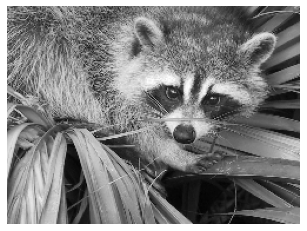

In [6]:
face = scipy.misc.face(gray=True)
face = cv2.resize(face, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(face,cmap='gray')
ax.axis("off")
plt.show()

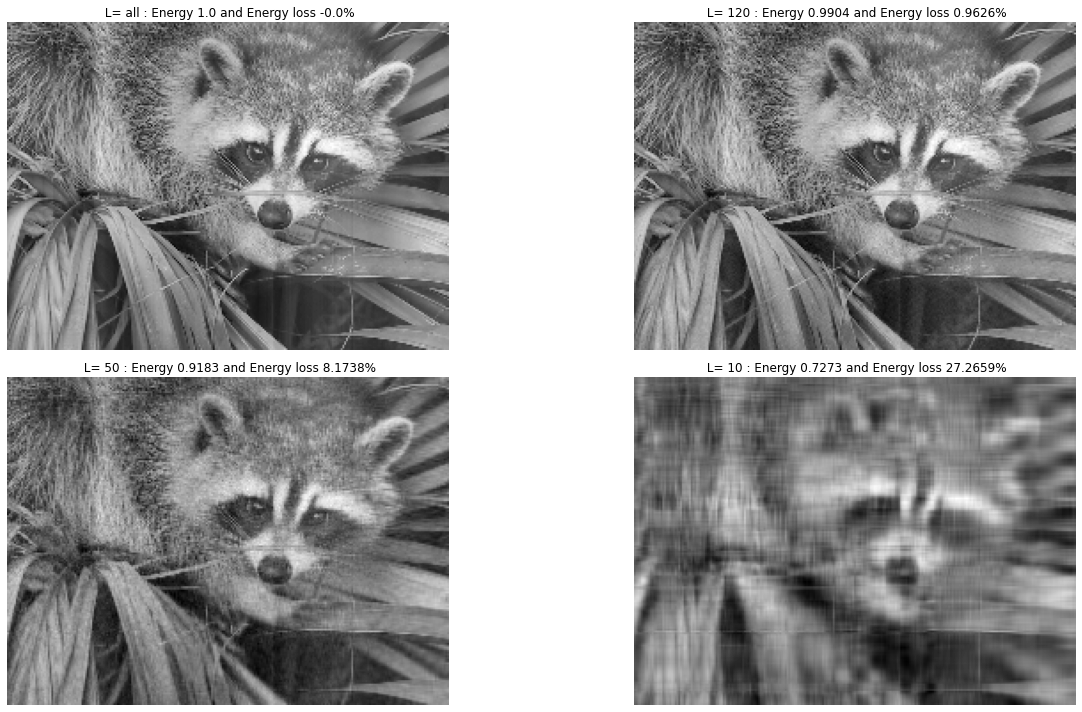

In [7]:
L = [-1, 120, 50,10]
fig = plt.figure(figsize=(20,10))
energies = []

for i, l in enumerate(L):

    u,s,vh,s_truncated = pca(face,l)

    energies.append(np.sum(pca_energy(face,l)))
    
    energy_loss = (1 - energies[i])*100
    
    new_face = u @ s_truncated @ vh
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(new_face,cmap='gray')
    ax.axis("off")
    ax.set_title(" L= {0} : Energy {1} and Energy loss {2}%"
                 .format(l if l!=-1 else"all", np.round(energies[i],4), np.round(energy_loss,4)))
plt.tight_layout()
plt.show()
#fig.savefig("figure/task1-3.png")
    

# Task1.3

In [8]:
df = pd.read_csv('datasets/data_DMAP_PCA_vadere.txt',delim_whitespace=True)
peds_dataset = np.array(df,dtype=float)

Text(0, 0.5, 'y')

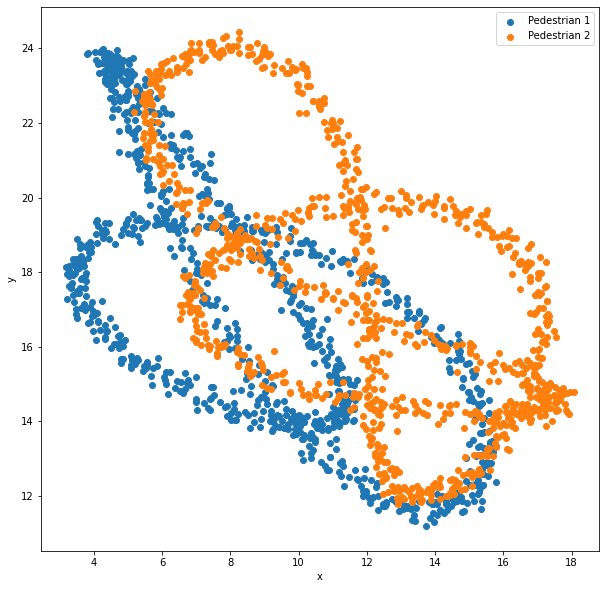

In [33]:
ped_1 = peds_dataset[:,:2]
ped_2 = peds_dataset[:,2:4]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(ped_1.T[0],ped_1.T[1],label ="Pedestrian 1")
ax.scatter(ped_2.T[0],ped_2.T[1],label ="Pedestrian 2")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
#fig.savefig("figure/task1-4.png")

Text(0.5, 1.0, 'Projection onto PC1 and PC2 preserving Energy 84.922%')

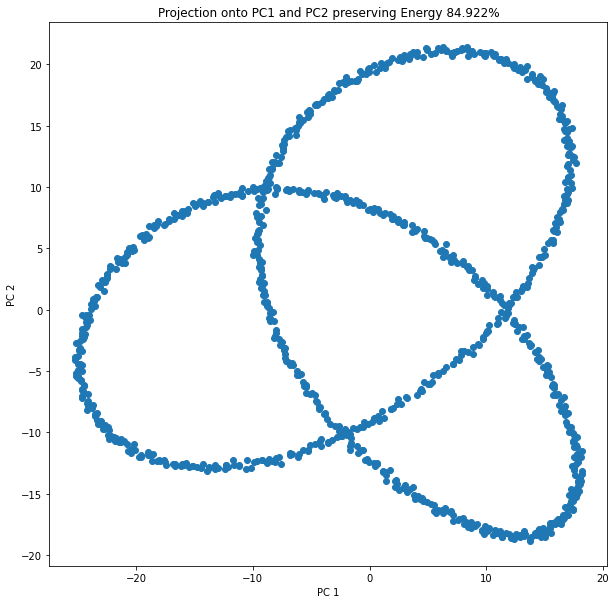

In [28]:
L = 2
u,s,vh,s_truncated = pca(peds_dataset,L)

projected_peds_dataset = u @ s_truncated
energy = pca_energy(peds_dataset,L)
energy_total = np.sum(energy)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(projected_peds_dataset[:,0],projected_peds_dataset[:,1])
ax.set(xlabel="PC 1",ylabel="PC 2")
ax.set_title("Projection onto PC1 and PC2 preserving Energy {0}%".format(np.round(energy_total*100,3)))
#fig.savefig("figure/task1-5.png")

Text(0.5, 0.92, 'Projection onto PC1,2,3 preserving Energy 99.713%')

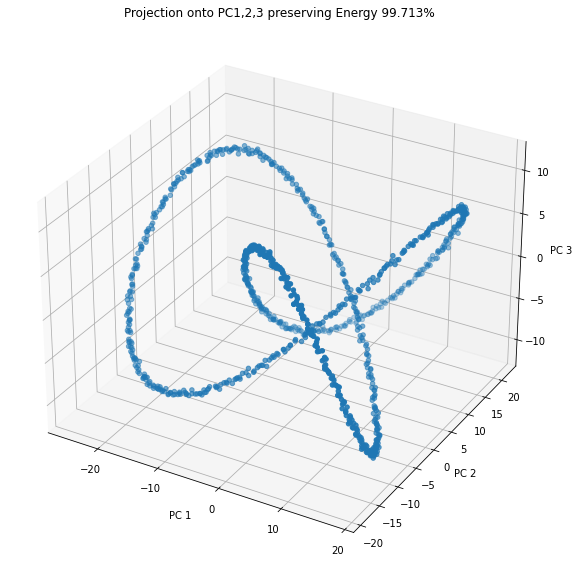

In [31]:
L = 3
u,s,vh,s_truncated = pca(peds_dataset,L)

projected_peds_dataset = u @ s_truncated
energy = pca_energy(peds_dataset,L)
energy_total = np.sum(energy)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(projected_peds_dataset[:,0],projected_peds_dataset[:,1],projected_peds_dataset[:,2])
ax.set(xlabel="PC 1",ylabel="PC 2",zlabel="PC 3")
ax.set_title("Projection onto PC1,2,3 preserving Energy {0}%".format(np.round(energy_total*100,3)))
#fig.savefig("figure/task1-6.png")